Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [56]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

[ 1  1  1  1 -1 -1 -1] [ 1  1  1  1 -1 -1 -1]
Acc: 1.000000


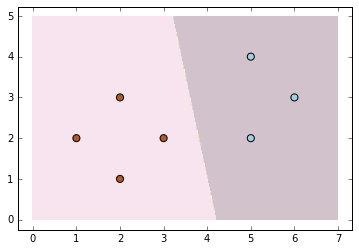

In [59]:
ridge = RidgeClassifier(alpha=0)
ridge.fit(seven_X, seven_y)

mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : ridge.predict(x) >= 0)
print 'Acc: %f' % accuracy_score(seven_y, ridge.predict(seven_X))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

Acc: 1.000000


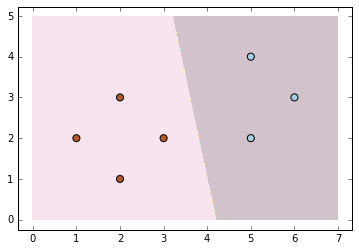

In [63]:
linear_reg = LinearRegression()
linear_reg.fit(seven_X, seven_y)

print 'Acc: %f' % accuracy_score(seven_y, map(lambda x: 1 if x else -1, linear_reg.predict(seven_X) >= 0))
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : linear_reg.predict(x) >= 0)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

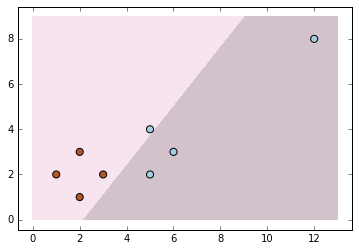

In [65]:
linear_reg = LinearRegression()
linear_reg.fit(outlier_X, outlier_y)

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x : linear_reg.predict(x) >= 0)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

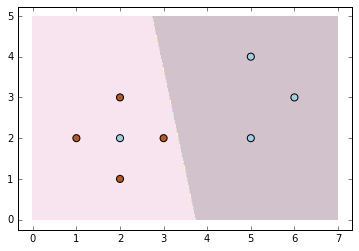

In [66]:
linear_reg = LinearRegression()
linear_reg.fit(unsep_X, unsep_y)

mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x : linear_reg.predict(x) >= 0)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

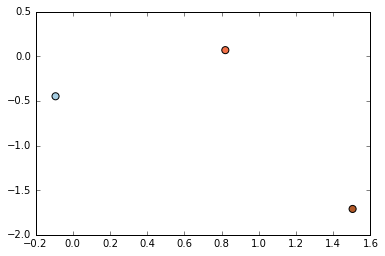

In [71]:
X, y = make_classification(
    n_features=2,
    n_classes=3,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_samples=3
)
mlutils.plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

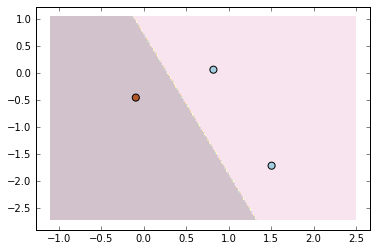

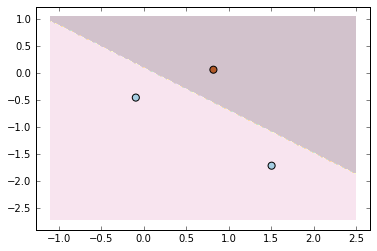

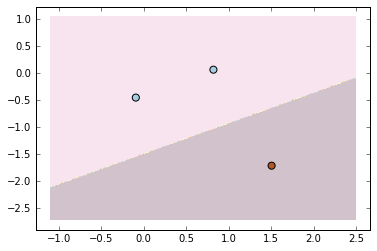

In [90]:
h = []
for class_index in range(3):
    y_OVR = [1 if ele==class_index else 0 for ele in y]
    
    linear_reg = LinearRegression()
    linear_reg.fit(X, y_OVR)
    h.append(linear_reg)
    mlutils.plot_2d_clf_problem(X, y_OVR, h=lambda x : linear_reg.predict(x) <= 0.5)
    plt.show()

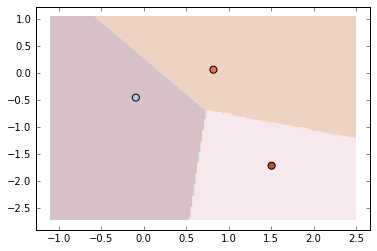

In [93]:
def h_multiclass(x):
    x = x.reshape(1, -1)
    return np.argmax([h[0].predict(x), h[1].predict(x), h[2].predict(x)])

mlutils.plot_2d_clf_problem(X, y, h=h_multiclass)

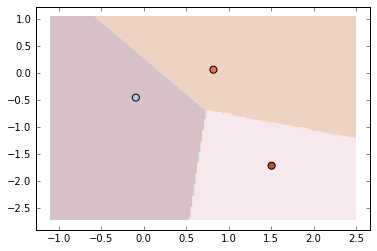

In [94]:
ridge = RidgeClassifier(alpha=0)
ridge.fit(X, y)

mlutils.plot_2d_clf_problem(X, y, h=ridge.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [15]:
def sigm(x, alpha=1):
    return 1. / (1 + np.exp(-alpha * x))

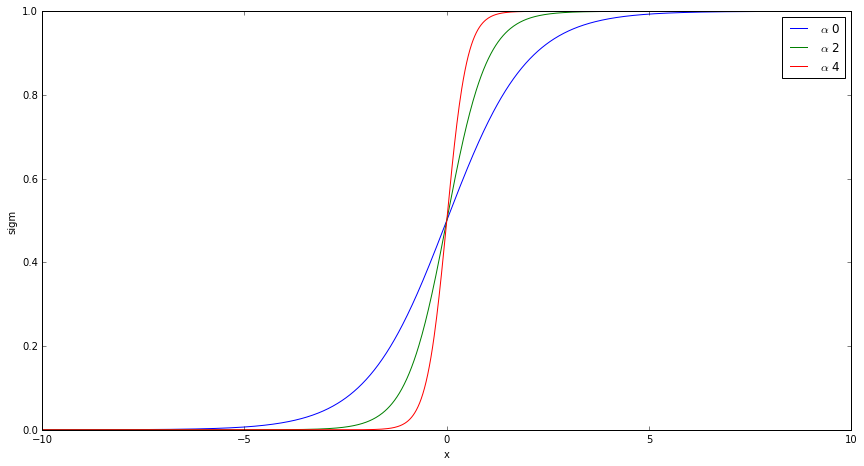

In [100]:
x = np.linspace(-10, 10, 1000)

for alpha in [1, 2, 4]:
    plt.plot(x, sigm(x, alpha))

plt.legend([r'$\alpha$ 0', r'$\alpha$ 2', r'$\alpha$ 4'])
plt.xlabel('x')
plt.ylabel('sigm')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 7.5)
fig.set_dpi(160)
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [215]:
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False, show=True):
    b = np.random.randn()
    
    number_of_features = X.shape[1]
    w = np.random.randn(number_of_features)
    N = len(y)

    weights = []
    previous_loss = 0
    
    for i in range(max_iter):    
        scores = np.dot(X, w) + b   # result classification N x 1
        probabilities = sigm(scores)
        loss = cross_entropy_error(X, y, w, b)
        
        if abs(loss-previous_loss) < epsilon:
            break
        
        if i % 300 == 0 and show:            
            print("iteration {}: loss {}".format(i, loss))

        dL_dscores = probabilities - y  # loss derivation on result classification N x 1

        grad_w = np.dot(dL_dscores, X)   # D x 1
        grad_b = np.sum(dL_dscores)   # 1 x 1

        w += -eta *( grad_w + (alpha * linalg.norm(w, 2)))
        b += -eta * grad_b
        
        weights.append([b, w])
        previous_loss = loss

    if show:
        print('Weights:', b, w)
    
    if trace:
        return w, b, weights
    else:
        return w, b

def lr_h(X, w, b):
    return sigm(np.dot(X, w) + b)

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [216]:
from sklearn.metrics import log_loss

def cross_entropy_error(X, y, w, b):
    h = lr_h(X, w, b)
    return log_loss(y, h)

def predict(X, w, b):
    probabilities = lr_h(X, w, b)
    return map(lambda x: 0 if x < 0.5 else 1, probabilities)

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

iteration 0: loss 0.972510982848
iteration 300: loss 0.259382600661
iteration 600: loss 0.161217542739
iteration 900: loss 0.11714808689
('Weights:', 5.4571218408265212, array([-1.64345968,  0.02691095]))

[ 0.89999     0.90473119  0.9795174   0.64119734  0.06259942  0.06583308
  0.01308776] [1, 1, 1, 1, 0, 0, 0]

Acc: 1.000000


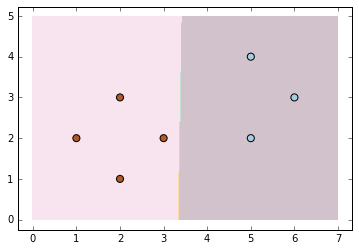

In [217]:
X = seven_X
y = map(lambda x : x if x==1 else 0, seven_y)

w, b = lr_train(X, y, eta=0.01, max_iter=5000, alpha=0.5)

print
print lr_h(X, w, b), y

mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : 0 if lr_h(x, w, b) <= 0.5 else 1)
print '\nAcc: %f' % accuracy_score(y, predict(X, w, b))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [208]:
from sklearn.metrics import zero_one_loss

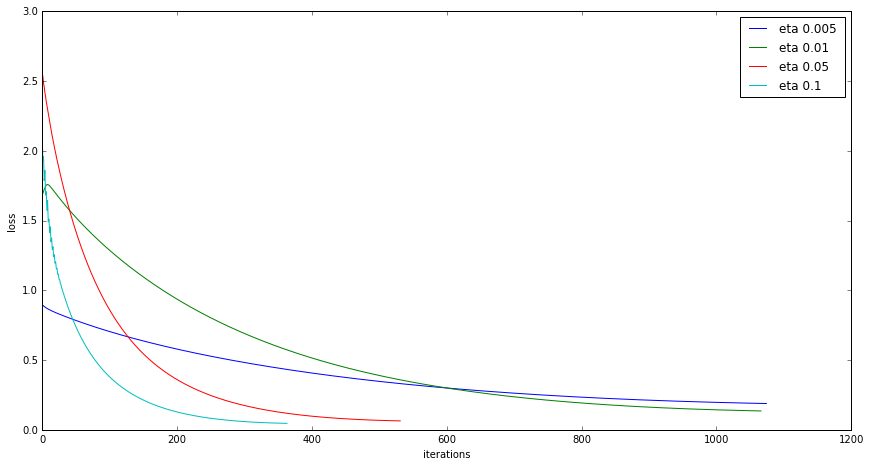

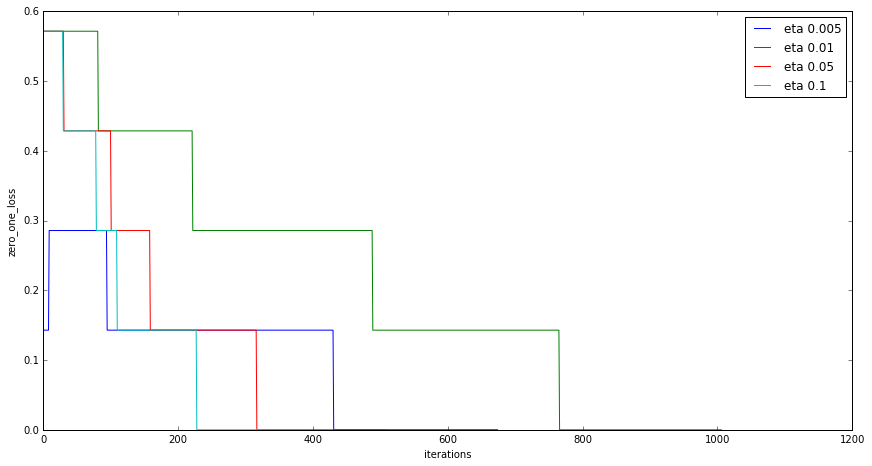

In [209]:
X = seven_X
y = map(lambda x : x if x==1 else 0, seven_y)

for eta in [0.005, 0.01, 0.05, 0.1]:
    w, b, weights = lr_train(X, y, eta=eta, max_iter=4000, trace=True, show=False)
    
    losses = []
    for weight in weights:
        b = weight[0]
        w = weight[1]
       
        loss = cross_entropy_error(X, y, w, b)
        losses.append(loss)  
        
    plt.plot(range(len(weights)), losses)
    
    
plt.xlabel('iterations')
plt.ylabel('loss')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 7.5)
fig.set_dpi(160)
plt.legend(['eta 0.005 ', 'eta 0.01', 'eta 0.05', 'eta 0.1'])
plt.show()

for eta in [0.005, 0.01, 0.05, 0.1]:
    w, b, weights = lr_train(X, y, eta=eta, max_iter=4000, trace=True, show=False)
    
    zero_one_losses = []
    for weight in weights:
        b = weight[0]
        w = weight[1]
        
        y_pred = predict(X, w, b)
        zero_one_loss_iter = zero_one_loss(y, y_pred)
        zero_one_losses.append(zero_one_loss_iter)
        
        
    plt.plot(range(len(weights)), zero_one_losses)

plt.xlabel('iterations')
plt.ylabel('zero_one_loss')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 7.5)
fig.set_dpi(160)
plt.legend(['eta 0.005', 'eta 0.01', 'eta 0.05', 'eta 0.1'])
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

Acc 1.000000


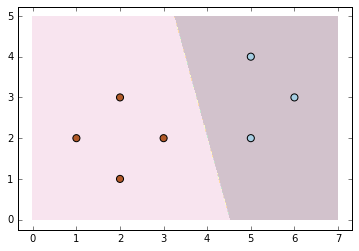

In [210]:
from sklearn.linear_model import LogisticRegression

X = seven_X
y = map(lambda x : x if x==1 else 0, seven_y)

linreg = LogisticRegression(n_jobs=4, solver='lbfgs')
linreg.fit(X, y)

print 'Acc %f' % accuracy_score(y, linreg.predict(X))
mlutils.plot_2d_clf_problem(X, y, h=linreg.predict)

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

Acc 1.000000


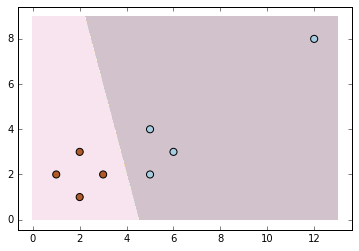

In [211]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

X = outlier_X
y = map(lambda x : x if x==1 else 0, outlier_y)

linreg = LogisticRegression(n_jobs=4, solver='lbfgs')
linreg.fit(X, y)

print 'Acc %f' % accuracy_score(y, linreg.predict(X))
mlutils.plot_2d_clf_problem(X, y, h=linreg.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


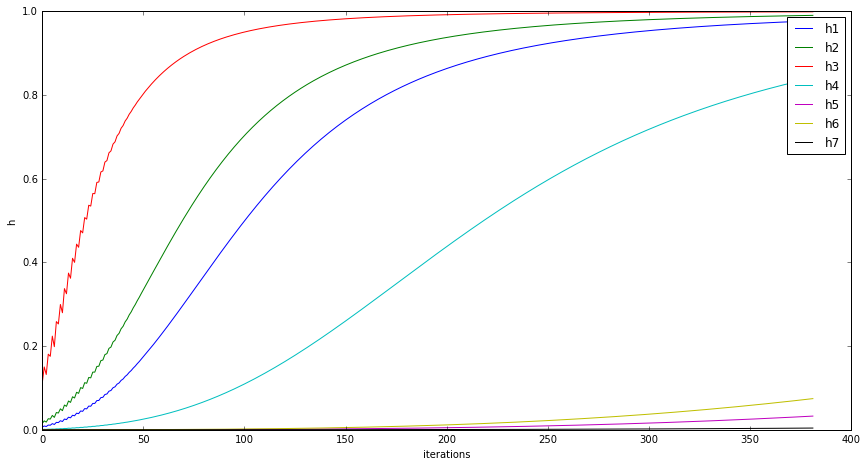

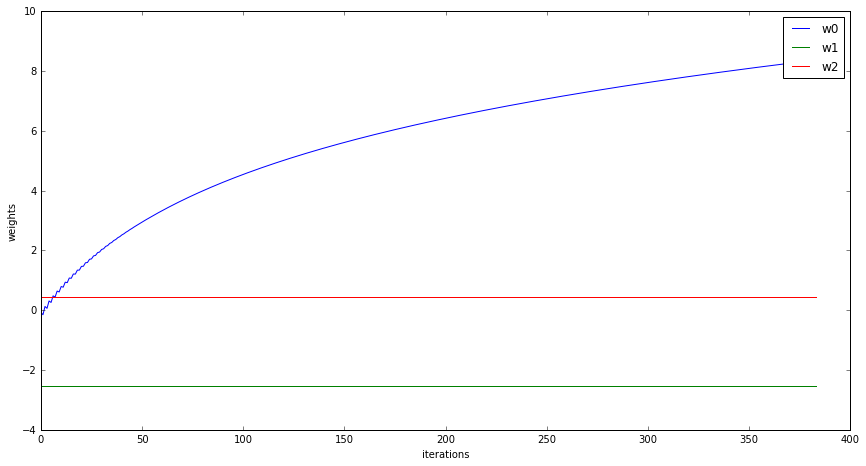

In [218]:
X = seven_X
y = map(lambda x : x if x==1 else 0, seven_y)


w, b, weights = lr_train(X, y, eta=eta, max_iter=4000, trace=True, show=False)
otuputs = []
for weight in weights:
    b = weight[0]
    w = weight[1]

    h = lr_h(X, w, b)
    otuputs.append(h)  

plt.plot(range(len(weights)), otuputs)
    
    
plt.xlabel('iterations')
plt.ylabel('h')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 7.5)
fig.set_dpi(160)
plt.legend(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7'])
plt.show()


w, b, weights = lr_train(X, y, eta=eta, max_iter=4000, trace=True, show=False)
params = []
for weight in weights:
    b = weight[0]
    w = weight[1]

    params.append([b, w[0], w[1]])  

plt.plot(range(len(weights)), params)

plt.xlabel('iterations')
plt.ylabel('weights')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 7.5)
fig.set_dpi(160)
plt.legend(['w0', 'w1', 'w2'])
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

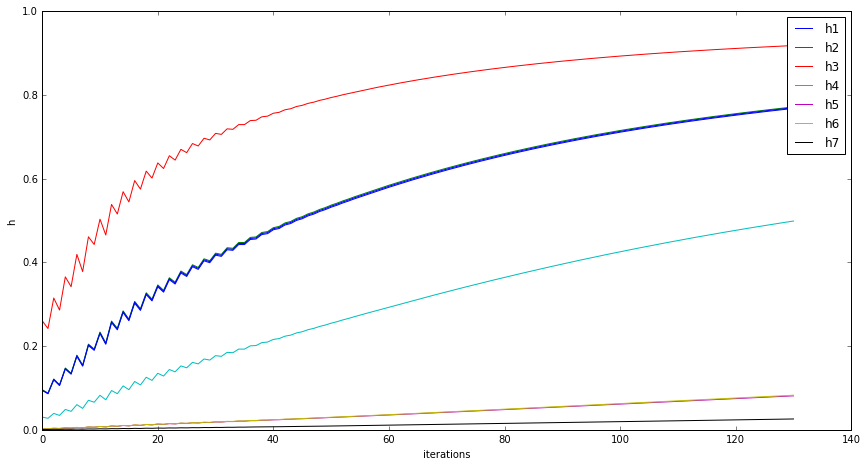

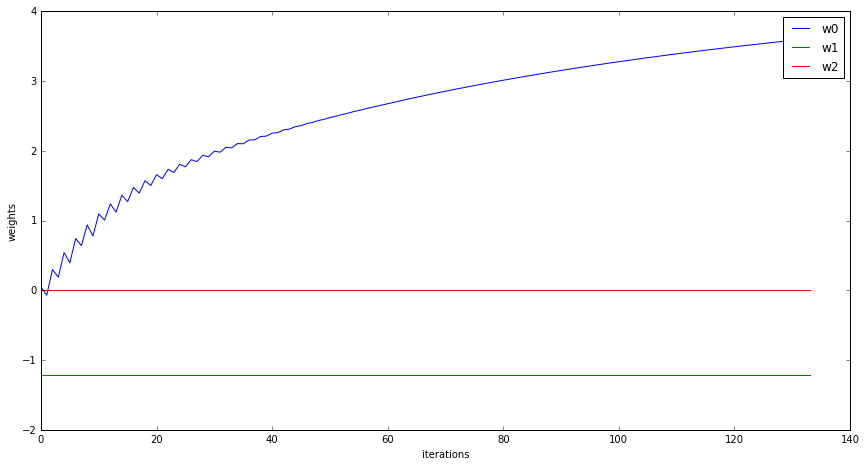

In [213]:
X = unsep_X
y = map(lambda x : x if x==1 else 0, unsep_y)


w, b, weights = lr_train(X, y, eta=eta, max_iter=4000, trace=True, show=False)
otuputs = []
for weight in weights:
    b = weight[0]
    w = weight[1]

    h = lr_h(X, w, b)
    otuputs.append(h)  

plt.plot(range(len(weights)), otuputs)
    
    
plt.xlabel('iterations')
plt.ylabel('h')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 7.5)
fig.set_dpi(160)
plt.legend(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7'])
plt.show()


w, b, weights = lr_train(X, y, eta=eta, max_iter=4000, trace=True, show=False)
params = []
for weight in weights:
    b = weight[0]
    w = weight[1]

    params.append([b, w[0], w[1]])  

plt.plot(range(len(weights)), params)

plt.xlabel('iterations')
plt.ylabel('weights')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 7.5)
fig.set_dpi(160)
plt.legend(['w0', 'w1', 'w2'])
plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

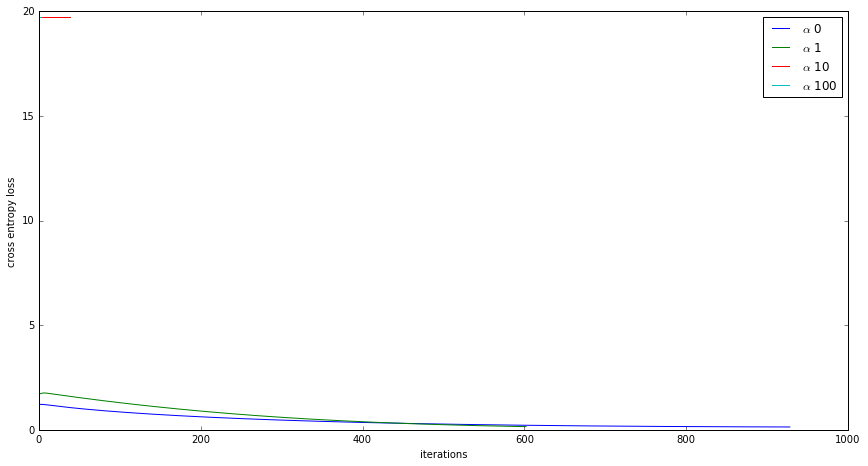

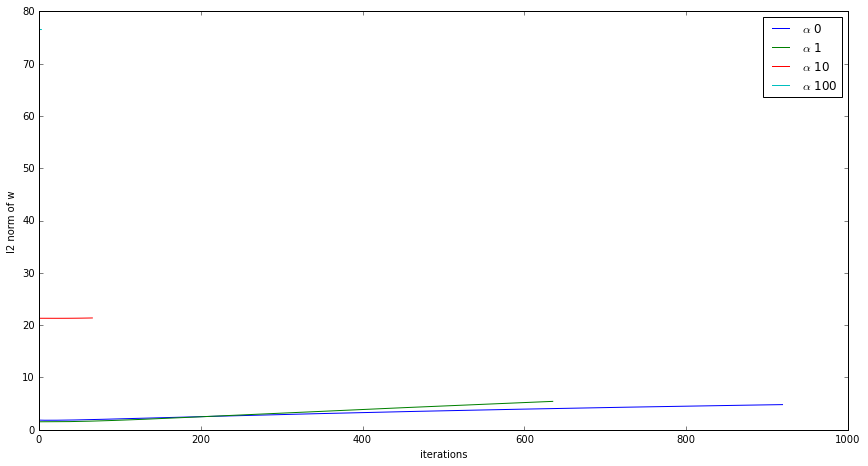

In [219]:
from numpy import linalg as LA

X = seven_X
y = map(lambda x : x if x==1 else 0, seven_y)

for alpha in [0, 1, 10, 100]:
    w, b, weights = lr_train(X, y, eta=0.01, max_iter=5000, alpha=alpha, show=False, trace=True)

    losses = []
    for weight in weights:
        b = weight[0]
        w = weight[1]

        losses.append(cross_entropy_error(X, y, w, b))  

    plt.plot(range(len(weights)), losses)
    
    
plt.xlabel('iterations')
plt.ylabel('cross entropy loss')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 7.5)
fig.set_dpi(160)
plt.legend([r'$\alpha$ 0', r'$\alpha$ 1', r'$\alpha$ 10', r'$\alpha$ 100'])
plt.show()


for alpha in [0, 1, 10, 100]:
    w, b, weights = lr_train(X, y, eta=0.01, max_iter=5000, alpha=alpha, show=False, trace=True)

    l2_norms = []
    for weight in weights:
        b = weight[0]
        w = weight[1]

        w_vector = np.array([b, w[0], w[1]])
        l2_norms.append(LA.norm(w_vector, 2))  

    plt.plot(range(len(weights)), l2_norms)
    
plt.xlabel('iterations')
plt.ylabel('l2 norm of w')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 7.5)
fig.set_dpi(160)
plt.legend([r'$\alpha$ 0', r'$\alpha$ 1', r'$\alpha$ 10', r'$\alpha$ 100'])
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [111]:
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split

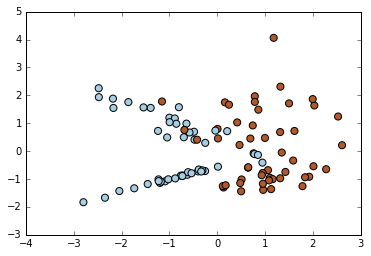

In [137]:
X, y = make_classification(n_features=2, n_clusters_per_class=2, n_redundant=0)
mlutils.plot_2d_clf_problem(X, y)

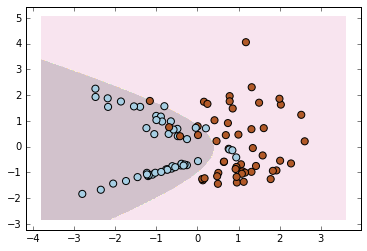

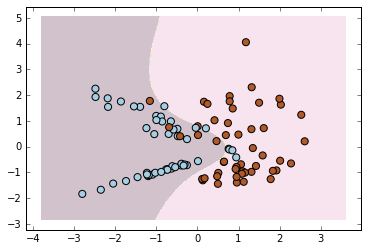

In [138]:
for dimension in [2, 3]:
    model = Pipeline([
            ('poly', PolynomialFeatures(dimension)),
            ('logreg', LogisticRegression(solver='lbfgs', max_iter=500))
        ])
    model.fit(X, y)
    mlutils.plot_2d_clf_problem(X, y, h=model.predict)
    plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

In [139]:
from sklearn.metrics import log_loss

Acc 0.885714


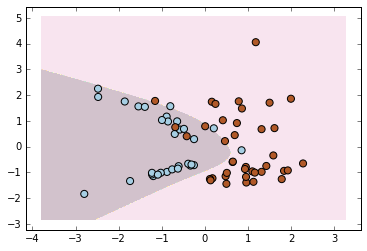

Acc 0.900000


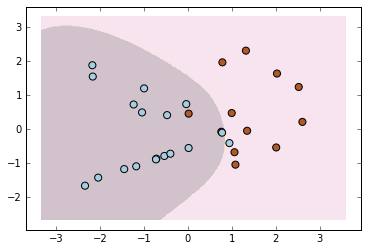

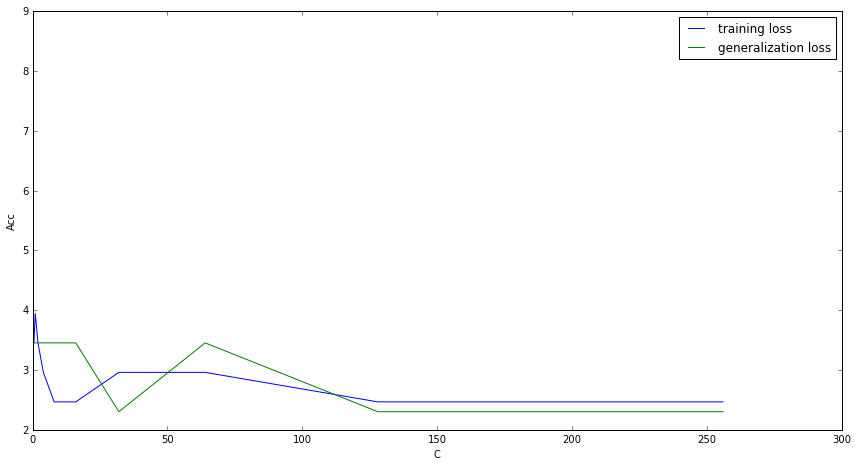

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = Pipeline([
        ('poly', PolynomialFeatures(degree=4)),
        ('logreg', LogisticRegression(solver='lbfgs', max_iter=500))
    ])

model.fit(X_train, y_train)

print 'Acc %f' % accuracy_score(y_train, model.predict(X_train))
mlutils.plot_2d_clf_problem(X_train, y_train, h=model.predict)
plt.show()


model.fit(X_test, y_test)

print 'Acc %f' % accuracy_score(y_test, model.predict(X_test))
mlutils.plot_2d_clf_problem(X_test, y_test, h=model.predict)
plt.show()

train_emp_loss = []
generalization_loss = []
alphas = range(-8, 9)
for alpha in alphas:
    C = 2 ** alpha
    
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=4)),
        ('logreg', LogisticRegression(solver='lbfgs', max_iter=50, C=C))
    ])
    
    model.fit(X_train, y_train)
    
    train_emp_loss.append(log_loss(y_train, model.predict(X_train)))
    generalization_loss.append(log_loss(y_test, model.predict(X_test)))
    
plt.xlabel('C')
plt.ylabel('Acc')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 7.5)
fig.set_dpi(160)
    
C = map(lambda x: 2 ** x, alphas)
plt.plot(C, train_emp_loss)
plt.plot(C, generalization_loss)
plt.legend(['training loss', 'generalization loss'])
plt.show()

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?